# Importing Data And Libraries

In [2]:
#Imported Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [4]:
#Imported path
path = r'/Users/kurtson/Desktop/House Sales'

In [8]:
#Import data
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'cleaned_home.csv'), index_col = False)

In [9]:
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [10]:
#Checked shape
df.shape

(21613, 18)

In [11]:
#Delete unnecessary columns
df = df.drop(columns=['Unnamed: 0'])

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,year_built,year_renovated,zipcode,latitude,longitude
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [13]:
df.shape

(21613, 17)

In [15]:
#Checked for missing values 
df.isnull().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
year_built        0
year_renovated    0
zipcode           0
latitude          0
longitude         0
dtype: int64

# Hypotheses

#### The higher the square footage of the home, the likelier the price will be higher

# Reshaping The Variables into NumPy arrays

In [34]:
# Reshaped variables into NumPy arrays and put them into separate objects.

x = df['price'].values.reshape(-1,1)
y = df['sqft_living'].values.reshape(-1,1)

In [35]:
x

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [36]:
y

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [37]:
# Split data into a training set and a test set.

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression Analysis

In [38]:
# Created a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [39]:
# Fit the regression object onto the training set.

regression.fit(x_train, y_train)

LinearRegression()

In [40]:
# Predicted the values of y using X.

y_predicted = regression.predict(x_test)

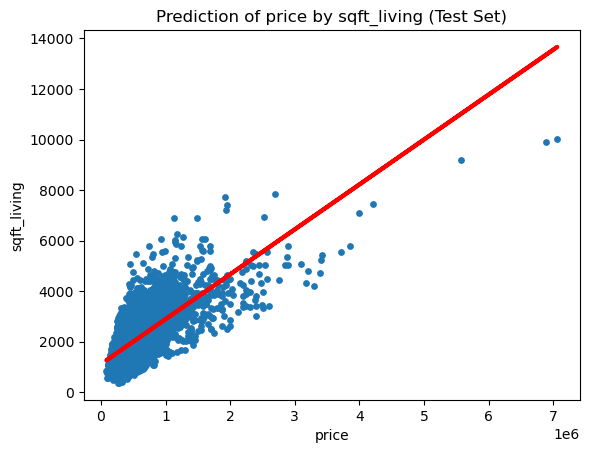

In [42]:
# Created a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(x_test, y_test, s = 15)
plot_test.plot(x_test, y_predicted,color='red', linewidth =3)
plot_test.title('Prediction of price by sqft_living (Test Set)')
plot_test.xlabel('price')
plot_test.ylabel('sqft_living')
plot_test.show()

In [43]:
# Created objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0017768]]
Mean squared error:  419493.85103103006
R2 score:  0.4885104293703798


In [45]:
# Created a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1430,1645.639743
1,4670,3921.717318
2,1440,2116.668755
3,1130,2239.978501
4,3180,2503.832927
5,1650,1979.677669
6,1720,1722.042034
7,2538,1714.234786
8,2460,1873.069820
9,4460,1988.561657


##### Compare how the regression fits the training set

In [51]:
# Predict.

y_predicted_train = regression.predict(x_train) # This is predicting x_train!

In [52]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [53]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0017768]]
Mean squared error:  431413.89233598957
R2 score:  0.49453356717789776


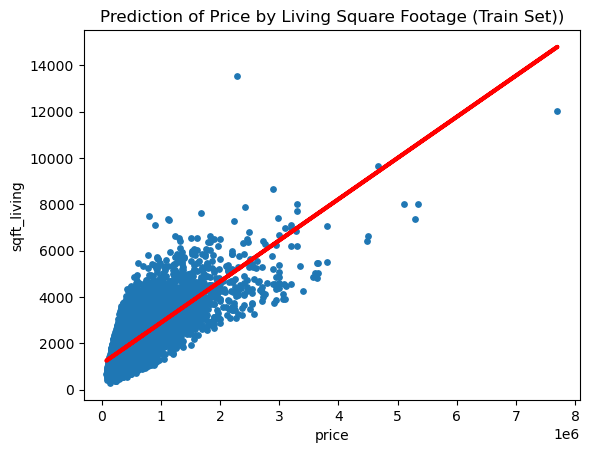

In [57]:
# Visualized the training set results.

plot_test = plt
plot_test.scatter(x_train, y_train, s = 15)
plot_test.plot(x_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Prediction of Price by Living Square Footage (Train Set))')
plot_test.xlabel('price')
plot_test.ylabel('sqft_living')
plot_test.show()

In [59]:
df.to_csv(os.path.join(path, 'Visualizations', 'regression_analysis_price_sqft.csv'))

In [60]:
# Printed the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0017768]]
Mean squared error:  431413.89233598957
R2 score:  0.49453356717789776


### Conclusions

#### Based on the knowledge gathered from this linear regression, we can see that the regression line is moving in a positive direction. This direction reflects that our hypothesis is mostly true. With that being said, our data received from the summary statistics offers further insight. We can  see that that the slope is a positive number reflecting the positive relationship as well. However our mean squared error is a high number and our R2 score is only 0.49 which only really equivalates to 49%, meaning that this model isn't the greatest fit.